In [1]:
# installing librosa
!pip install librosa

## ***Part 1  Speech Denoising Using Deep Learning***

In [2]:
# got a error regarding colab and used this link solution to solve it
#https://stackoverflow.com/questions/71316443/google-colab-error-import-tensorflow-keras-models-could-not-be-resolvedrepor
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
import soundfile as sf
from IPython.display import Audio, display



Importing Data






In [3]:
import librosa
s, sr=librosa.load('/content/train_clean_male.wav', sr=None)
S=librosa.stft(s, n_fft=1024, hop_length=512)
sn, sr=librosa.load('/content/train_dirty_male.wav', sr=None)
X=librosa.stft(sn, n_fft=1024, hop_length=512)

In [4]:
#lookimng at the imported data

In [5]:
s

array([ 4.8828125e-04,  1.5258789e-04,  2.1362305e-04, ...,
        9.1552734e-05,  9.1552734e-05, -1.2207031e-04], dtype=float32)

In [6]:
s.shape

(1258899,)

In [7]:
sr

16000

In [8]:
# if you look at the data its has complex values so therefore talking abs in the furthure steps
S

array([[ 6.2130676e-03+0.00000000e+00j,  1.1326679e-02+0.00000000e+00j,
         1.1311449e-02+0.00000000e+00j, ...,
        -1.9435661e-02+0.00000000e+00j, -8.2834195e-03+0.00000000e+00j,
         1.6948308e-03+0.00000000e+00j],
       [-3.9766929e-03+3.18530016e-03j, -5.8471980e-03+1.92323478e-03j,
        -4.9916869e-03+1.33694301e-03j, ...,
         1.2399258e-02-2.94200727e-03j,  3.2734389e-03+1.41162460e-03j,
         4.2564110e-03-1.32635445e-03j],
       [ 1.3212914e-03-2.71033845e-03j, -3.9865682e-04-1.69004453e-03j,
        -4.4653739e-04-3.15565290e-03j, ...,
        -3.0208891e-03-6.29775343e-04j,  3.8380092e-03+1.11574605e-02j,
        -9.4250655e-03+8.11278168e-03j],
       ...,
       [ 4.4096759e-04+7.81580020e-05j, -7.1495574e-06+1.27830135e-03j,
         8.8752218e-04-3.28958355e-04j, ...,
        -8.9677225e-05-9.15538869e-04j, -6.1033864e-04-5.72167337e-04j,
        -4.4986757e-04-1.53595430e-03j],
       [-4.9851980e-04+4.40897275e-05j, -4.1133209e-04-1.02382002e-0

In [9]:
S.shape

(513, 2459)

In [10]:
sn

array([ 0.00048828,  0.00018311,  0.00021362, ...,  0.0007019 ,
       -0.00045776, -0.00097656], dtype=float32)

In [11]:
sn.shape

(1258899,)

In [12]:
sr

16000

In [13]:
# if you look at the data its has complex values so therefore talking abs in the furthure steps
X

array([[ 0.00670178+0.j        ,  0.00845048+0.j        ,
        -0.02074819+0.j        , ..., -0.01521357+0.j        ,
        -0.00498119+0.j        , -0.00869904+0.j        ],
       [-0.00377713+0.00331744j, -0.00694739+0.00518844j,
         0.02393051+0.00334143j, ...,  0.01209502-0.0094868j ,
        -0.0003121 -0.00147516j,  0.01879329+0.0057191j ],
       [ 0.00180221-0.0025607j , -0.01596787-0.01776356j,
         0.00885831+0.00834974j, ..., -0.01236706+0.00593061j,
         0.00767359+0.02129928j, -0.02906702-0.00026474j],
       ...,
       [ 0.00027132+0.00027508j, -0.00415163-0.00110225j,
         0.00119022-0.00206137j, ...,  0.000537  +0.00076432j,
        -0.01197942+0.007164j  , -0.0089397 -0.00842857j],
       [-0.00048332-0.00017519j,  0.00263221-0.00154082j,
         0.0007623 +0.00593539j, ..., -0.00381498-0.00602088j,
         0.00579493-0.00399565j,  0.01494528+0.01014255j],
       [ 0.00055442+0.j        , -0.00036182+0.j        ,
        -0.00119815+0.j       

In [14]:
X.shape

(513, 2459)

In [15]:
# as S and X are complex valued taking so talking absolute for them
S_abs_val = np.abs(S)
X_abs_val = np.abs(X)

In [16]:
S_abs_val

array([[0.00621307, 0.01132668, 0.01131145, ..., 0.01943566, 0.00828342,
        0.00169483],
       [0.00509512, 0.00615537, 0.00516763, ..., 0.01274351, 0.00356484,
        0.00445828],
       [0.00301525, 0.00173643, 0.00318709, ..., 0.00308584, 0.01179912,
        0.0124358 ],
       ...,
       [0.00044784, 0.00127832, 0.00094652, ..., 0.00091992, 0.00083659,
        0.00160048],
       [0.00050047, 0.00110336, 0.00104441, ..., 0.00122437, 0.00183458,
        0.00084849],
       [0.00037455, 0.00068581, 0.0013387 , ..., 0.00146104, 0.00243181,
        0.00169608]], dtype=float32)

In [17]:
S_abs_val.shape

(513, 2459)

In [18]:
X_abs_val.shape

(513, 2459)

In [19]:
# taking transpose to fit the values to the model

In [20]:
X_abs_val_transposed=X_abs_val.T

In [21]:
S_abs_val_Transposed=S_abs_val.T

In [22]:
import librosa
s, sr=librosa.load('/content/test_s_01.wav', sr=None)
S_test=librosa.stft(s, n_fft=1024, hop_length=512)
sn, sr=librosa.load('/content/test_x_01.wav', sr=None)
X_test=librosa.stft(sn, n_fft=1024, hop_length=512)

In [23]:
X_test_abs_val_transposed = np.transpose(np.abs(X_test))

In [24]:
S_test_abs_val_transposed = np.transpose(np.abs(S_test))

In [25]:
X_test_abs_val_transposed.shape,S_test_abs_val_transposed.shape

((142, 513), (142, 513))

In [26]:
# Define a custom initializer of he normal
def custom_initializer(shape, dtype=None):
    return tf.keras.initializers.he_normal()(shape, dtype=dtype)

In [27]:
model_p1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1024  , input_dim=513, kernel_initializer=custom_initializer),
    tf.keras.layers.ReLU(),
    # tf.keras.layers.Dense(2048),
    # tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(1024),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(513),
    tf.keras.layers.ReLU()
])

In [28]:
model_p1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              526336    
                                                                 
 re_lu (ReLU)                (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 re_lu_1 (ReLU)              (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 513)               525825    
                                                                 
 re_lu_2 (ReLU)              (None, 513)               0         
                                                                 
Total params: 2101761 (8.02 MB)
Trainable params: 210176

In [29]:
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer_fn = tf.keras.optimizers.Adam(learning_rate=0.00001,use_ema=True)

In [30]:
# Compile the model (add optimizer and loss function)
model_p1.compile(optimizer=optimizer_fn, loss='mse',metrics=['accuracy'])

In [31]:
epochs = 500
history_p1 = model_p1.fit(X_abs_val_transposed, S_abs_val_Transposed,batch_size=32, epochs=epochs, validation_data=(X_test_abs_val_transposed, S_test_abs_val_transposed))

Epoch 1/500
77/77 [==============================] - 6s 6ms/step - loss: 0.0997 - accuracy: 0.0110 - val_loss: 0.2546 - val_accuracy: 0.0141
Epoch 2/500
77/77 [==============================] - 0s 4ms/step - loss: 0.0834 - accuracy: 0.0403 - val_loss: 0.2327 - val_accuracy: 0.0352
Epoch 3/500
77/77 [==============================] - 0s 4ms/step - loss: 0.0727 - accuracy: 0.0683 - val_loss: 0.2178 - val_accuracy: 0.0634
Epoch 4/500
77/77 [==============================] - 0s 4ms/step - loss: 0.0641 - accuracy: 0.1000 - val_loss: 0.2075 - val_accuracy: 0.0845
Epoch 5/500
77/77 [==============================] - 0s 4ms/step - loss: 0.0574 - accuracy: 0.1366 - val_loss: 0.1991 - val_accuracy: 0.0915
Epoch 6/500
77/77 [==============================] - 0s 4ms/step - loss: 0.0524 - accuracy: 0.1659 - val_loss: 0.1918 - val_accuracy: 0.0986
Epoch 7/500
77/77 [==============================] - 0s 4ms/step - loss: 0.0481 - accuracy: 0.1863 - val_loss: 0.1855 - val_accuracy: 0.1127
Epoch 8/500
7

In [32]:
# calculating snr

In [33]:
snr_value =  10 * np.log10(np.sum(np.square(S_abs_val_Transposed))/np.sum(np.square(S_abs_val_Transposed-(model_p1.predict(X_abs_val_transposed)))))

77/77 [==============================] - 0s 1ms/step


In [34]:
print(snr_value)

15.701020956039429


In [35]:
# ref : https://librosa.org/doc/main/generated/librosa.istft.html
# ref :

In [36]:
# creating testing samples

In [37]:
s, sr = librosa.load('/content/test_x_01.wav',sr=None)
testing_1 = librosa.stft(s, n_fft=1024, hop_length=512)
testing_1_abs = np.abs(testing_1)
testing_1_abs_transposed = testing_1_abs.T
testing_1_prediction = model_p1.predict(testing_1_abs_transposed)
testing_1_prediction = testing_1_prediction.T
S_testing_1 = np.multiply(np.divide(testing_1,testing_1_abs), testing_1_prediction)
sf.write('reconstructed_test_x_01_1.wav',librosa.istft(S_testing_1,hop_length=512),sr)

5/5 [==============================] - 0s 2ms/step


In [38]:
display(Audio('/content/reconstructed_test_x_01_1.wav', autoplay=True))


In [39]:
s, sr = librosa.load('/content/test_x_02.wav',sr=None)
testing_2 = librosa.stft(s, n_fft=1024, hop_length=512)
testing_2_abs = np.abs(testing_2)
testing_2_abs_transposed = testing_2_abs.T
testing_2_prediction = model_p1.predict(testing_2_abs_transposed)
testing_2_prediction = testing_2_prediction.T
S_testing_2 = np.multiply(np.divide(testing_2,testing_2_abs), testing_2_prediction)
sf.write('reconstructed_test_x_02_1.wav',librosa.istft(S_testing_2,hop_length=512),sr)

12/12 [==============================] - 0s 2ms/step


In [40]:
#ref for playing audio in colab https://stackoverflow.com/questions/68581187/playing-sound-in-google-colab
display(Audio('/content/reconstructed_test_x_02_1.wav', autoplay=True))


## ***Part 2  Speech Denoising Using 1D 2CNN***

In [41]:
import librosa
s, sr=librosa.load('/content/train_clean_male.wav', sr=None)
S=librosa.stft(s, n_fft=1024, hop_length=512)
sn, sr=librosa.load('/content/train_dirty_male.wav', sr=None)
X=librosa.stft(sn, n_fft=1024, hop_length=512)

In [42]:
# as S and X are complex valued taking so talking absolute for them
S_abs_val_Transposed = np.abs(S).T
X_abs_val_transposed = np.abs(X).T

In [43]:
X_abs_val_transposed.shape, S_abs_val_Transposed.shape

((2459, 513), (2459, 513))

In [44]:
import librosa
s, sr=librosa.load('/content/test_s_01.wav', sr=None)
S_test=librosa.stft(s, n_fft=1024, hop_length=512)
sn, sr=librosa.load('/content/test_x_01.wav', sr=None)
X_test=librosa.stft(sn, n_fft=1024, hop_length=512)

In [45]:
X_test_abs_val_transposed = np.transpose(np.abs(X_test))

In [46]:
S_test_abs_val_transposed = np.transpose(np.abs(S_test))

In [47]:
X_test_abs_val_transposed.shape,S_test_abs_val_transposed.shape

((142, 513), (142, 513))

In [48]:
 # write new architecture for this
# creating base line model with the given architecture
def custom_initializer(shape, dtype=None):
  initial_weights = tf.keras.initializers.HeNormal()(shape, dtype=dtype)
  return initial_weights
model_p2 = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=4,input_shape = (513,1), activation = 'relu',padding='valid', kernel_initializer=custom_initializer),
    tf.keras.layers.MaxPooling1D(pool_size=4, strides=4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation = 'relu', kernel_initializer=custom_initializer),
    tf.keras.layers.Dense(513, activation = 'relu', kernel_initializer=custom_initializer),
])
model_p2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 510, 32)           160       
                                                                 
 max_pooling1d (MaxPooling1  (None, 127, 32)           0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4064)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              4162560   
                                                                 
 dense_4 (Dense)             (None, 513)               525825    
                                                                 
Total params: 4688545 (17.89 MB)
Trainable params: 4688545 (17.89 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [49]:
optimize_adam = tf.keras.optimizers.Adam(learning_rate=0.0003)
model_p2.compile(optimizer=optimize_adam,loss='mse',metrics=['accuracy'])

In [50]:
epochs = 400
history_p2 = model_p2.fit(X_abs_val_transposed, S_abs_val_Transposed,batch_size=32, epochs=epochs,validation_data=(X_test_abs_val_transposed, S_test_abs_val_transposed))

Epoch 1/400
77/77 [==============================] - 7s 7ms/step - loss: 0.0560 - accuracy: 0.1468 - val_loss: 0.1673 - val_accuracy: 0.2113
Epoch 2/400
77/77 [==============================] - 0s 4ms/step - loss: 0.0274 - accuracy: 0.2753 - val_loss: 0.1461 - val_accuracy: 0.2676
Epoch 3/400
77/77 [==============================] - 0s 4ms/step - loss: 0.0220 - accuracy: 0.3339 - val_loss: 0.1314 - val_accuracy: 0.2394
Epoch 4/400
77/77 [==============================] - 0s 4ms/step - loss: 0.0199 - accuracy: 0.3615 - val_loss: 0.1229 - val_accuracy: 0.2676
Epoch 5/400
77/77 [==============================] - 0s 4ms/step - loss: 0.0185 - accuracy: 0.3790 - val_loss: 0.1156 - val_accuracy: 0.2817
Epoch 6/400
77/77 [==============================] - 0s 4ms/step - loss: 0.0177 - accuracy: 0.3737 - val_loss: 0.1097 - val_accuracy: 0.2958
Epoch 7/400
77/77 [==============================] - 0s 4ms/step - loss: 0.0167 - accuracy: 0.3973 - val_loss: 0.1072 - val_accuracy: 0.2746
Epoch 8/400
7

In [51]:
snr_value =  10 * np.log10(np.sum(np.square(S_abs_val_Transposed))/np.sum(np.square(S_abs_val_Transposed-(model_p2.predict(X_abs_val_transposed)))))

77/77 [==============================] - 0s 2ms/step


In [52]:
print(snr_value)

21.99388027191162


In [53]:
s, sr = librosa.load('/content/test_x_01.wav',sr=None)
testing_1 = librosa.stft(s, n_fft=1024, hop_length=512)
testing_1_abs = np.abs(testing_1)
testing_1_abs_transposed = testing_1_abs.T
testing_1_prediction = model_p2.predict(testing_1_abs_transposed)
testing_1_prediction = testing_1_prediction.T
S_testing_1 = np.multiply(np.divide(testing_1,testing_1_abs), testing_1_prediction)
sf.write('reconstructed_test_x_01_2.wav',librosa.istft(S_testing_1,hop_length=512),sr)

5/5 [==============================] - 0s 2ms/step


In [54]:
display(Audio('/content/reconstructed_test_x_01_2.wav', autoplay=True))


In [55]:
s, sr = librosa.load('/content/test_x_02.wav',sr=None)
testing_2 = librosa.stft(s, n_fft=1024, hop_length=512)
testing_2_abs = np.abs(testing_2)
testing_2_abs_transposed = testing_2_abs.T
testing_2_prediction = model_p2.predict(testing_2_abs_transposed)
testing_2_prediction = testing_2_prediction.T
S_testing_2 = np.multiply(np.divide(testing_2,testing_2_abs), testing_2_prediction)
sf.write('reconstructed_test_x_02_2.wav',librosa.istft(S_testing_2,hop_length=512),sr)

12/12 [==============================] - 0s 3ms/step


In [56]:
#ref for playing audio in colab https://stackoverflow.com/questions/68581187/playing-sound-in-google-colab
display(Audio('/content/reconstructed_test_x_02_2.wav', autoplay=True))


#Part 3 Data Augmentation

In [1]:
# importing basic packages
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# getting the data set
(x_train , y_train) , (x_test , y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
# ref :https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
# normalizing the train and test data

In [5]:
# rescale the pixels to [-1, 1]
# after normalization the data was in the range of 0-1 then if we multiply it by 2 it is in the range of 0-2 then subtracting 1 its in the range of -1 to 1
x_train = 2*x_train - 1
x_test = 2*x_test - 1

In [6]:
# so we have 50000image sample, adn to save 5000 for validation and testing we need to use train test split with 0.10 as the parameter as test side to get us val dataset of 5000


In [7]:
# ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=42)

In [9]:
# training dataset shape
X_train.shape

(45000, 32, 32, 3)

In [10]:
# validation dataset shape
X_val.shape


(5000, 32, 32, 3)

In [11]:
input_shape_image = X_train.shape[1:]

In [12]:
# creating base line model with the given architecture
def custom_initializer(shape, dtype=None):
  initial_weights = tf.keras.initializers.HeNormal()(shape, dtype=dtype)
  return initial_weights
model_p3_baseline = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=(5, 5), input_shape=input_shape_image, strides=1,activation = 'relu', kernel_initializer=custom_initializer),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=10, kernel_size=(5, 5), strides=1, activation = 'relu', kernel_initializer=custom_initializer),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(20,activation = 'relu', kernel_initializer=custom_initializer),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])
model_p3_baseline.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 10)        760       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 10)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 10)        2510      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 10)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 250)               0         
                                                                 
 dense (Dense)               (None, 20)                5

In [13]:
loss_fn =tf.keras.metrics.sparse_categorical_crossentropy
optimizer_fn = tf.keras.optimizers.Adam(learning_rate=0.001)

In [14]:
# Compile the model (add optimizer and loss function)
model_p3_baseline.compile(optimizer=optimizer_fn, loss=loss_fn,metrics=['accuracy'])

In [15]:
history_model_p3_baseline = model_p3_baseline.fit(X_train,Y_train,epochs=200,batch_size=512,validation_data=(X_val,Y_val))

Epoch 1/200
88/88 [==============================] - 12s 15ms/step - loss: 2.1254 - accuracy: 0.2199 - val_loss: 1.8930 - val_accuracy: 0.3160
Epoch 2/200
88/88 [==============================] - 1s 8ms/step - loss: 1.7224 - accuracy: 0.3818 - val_loss: 1.6324 - val_accuracy: 0.4092
Epoch 3/200
88/88 [==============================] - 1s 8ms/step - loss: 1.5363 - accuracy: 0.4463 - val_loss: 1.5017 - val_accuracy: 0.4506
Epoch 4/200
88/88 [==============================] - 1s 8ms/step - loss: 1.4472 - accuracy: 0.4810 - val_loss: 1.4398 - val_accuracy: 0.4764
Epoch 5/200
88/88 [==============================] - 1s 7ms/step - loss: 1.3882 - accuracy: 0.5039 - val_loss: 1.3996 - val_accuracy: 0.4950
Epoch 6/200
88/88 [==============================] - 1s 8ms/step - loss: 1.3492 - accuracy: 0.5198 - val_loss: 1.3629 - val_accuracy: 0.5138
Epoch 7/200
88/88 [==============================] - 1s 8ms/step - loss: 1.3161 - accuracy: 0.5342 - val_loss: 1.3298 - val_accuracy: 0.5282
Epoch 8/200

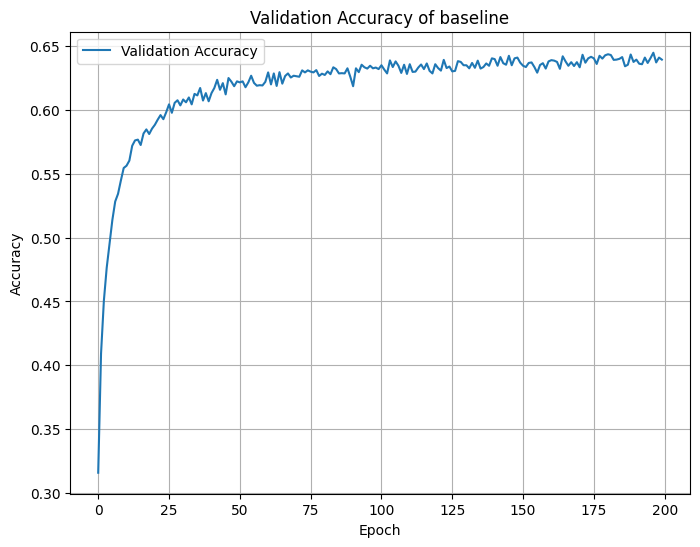

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(history_model_p3_baseline.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy of baseline')
plt.legend()
plt.grid()
plt.show()

In [17]:
# dataset augmentation
(x_train , y_train) , (x_test , y_test) = tf.keras.datasets.cifar10.load_data()

In [18]:
# ref :https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
# normalizing the train and test data

In [19]:
# so we have 50000image sample, adn to save 5000 for validation and testing we need to use train test split with 0.10 as the parameter as test side to get us val dataset of 5000


In [20]:
# ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=42)

In [22]:
# training dataset shape
X_train.shape

(45000, 32, 32, 3)

In [23]:
# validation dataset shape
X_val.shape

(5000, 32, 32, 3)

In [24]:
X_train_augmented_dataset_1 = np.minimum(1.1*X_train, 1)

In [25]:
X_train_augmented_dataset_2 = 0.9*X_train

In [26]:
# ref :https://www.tensorflow.org/api_docs/python/tf/image/flip_left_right
X_train_augmented_dataset_3 = tf.image.flip_left_right(X_train)

In [27]:
X_train_augmented_dataset_4 = X_train

In [28]:
(X_train_augmented_dataset_1.shape, X_train_augmented_dataset_2.shape, X_train_augmented_dataset_3.shape, X_train_augmented_dataset_4.shape)


((45000, 32, 32, 3),
 (45000, 32, 32, 3),
 TensorShape([45000, 32, 32, 3]),
 (45000, 32, 32, 3))

In [29]:
X_train_final_augmented_dataset = np.concatenate((X_train_augmented_dataset_1, X_train_augmented_dataset_2, X_train_augmented_dataset_3, X_train_augmented_dataset_4))


In [30]:
Y_train_final_augmented_dataset = np.concatenate((Y_train, Y_train, Y_train, Y_train))

In [31]:
# rescale the pixels to [-1, 1]
# after normalization the data was in the range of 0-1 then if we multiply it by 2 it is in the range of 0-2 then subtracting 1 its in the range of -1 to 1
X_train_final_augmented_dataset = 2*X_train_final_augmented_dataset - 1
X_val = 2*X_val - 1

In [32]:
(Y_train_final_augmented_dataset.shape,X_train_final_augmented_dataset.shape)

((180000, 1), (180000, 32, 32, 3))

In [33]:
input_shape_image = X_train_final_augmented_dataset.shape[1:]

In [34]:
# creating base line model with the given architecture
def custom_initializer(shape, dtype=None):
  initial_weights = tf.keras.initializers.HeNormal()(shape, dtype=dtype)
  return initial_weights
model_p3_baseline_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=(5, 5), input_shape=input_shape_image, strides=1,activation = 'relu', kernel_initializer=custom_initializer),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=10, kernel_size=(5, 5), strides=1, activation = 'relu', kernel_initializer=custom_initializer),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(20,activation = 'relu', kernel_initializer=custom_initializer),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])
model_p3_baseline_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 10)        760       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 10)        2510      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 10)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 250)               0         
                                                                 
 dense_2 (Dense)             (None, 20)               

In [35]:
loss_fn =tf.keras.metrics.sparse_categorical_crossentropy
optimizer_fn = tf.keras.optimizers.Adam(learning_rate=0.001)

In [36]:
# Compile the model (add optimizer and loss function)
model_p3_baseline_2.compile(optimizer=optimizer_fn, loss=loss_fn,metrics=['accuracy'])

In [37]:
history_model_p3_baseline_2 = model_p3_baseline_2.fit(X_train_final_augmented_dataset,Y_train_final_augmented_dataset,epochs=200,batch_size=2048,validation_data=(X_val,Y_val))

Epoch 1/200
88/88 [==============================] - 4s 30ms/step - loss: 2.1216 - accuracy: 0.2181 - val_loss: 1.8564 - val_accuracy: 0.3198
Epoch 2/200
88/88 [==============================] - 2s 22ms/step - loss: 1.6711 - accuracy: 0.3862 - val_loss: 1.5627 - val_accuracy: 0.4274
Epoch 3/200
88/88 [==============================] - 2s 22ms/step - loss: 1.4810 - accuracy: 0.4623 - val_loss: 1.4531 - val_accuracy: 0.4714
Epoch 4/200
88/88 [==============================] - 2s 22ms/step - loss: 1.3902 - accuracy: 0.4987 - val_loss: 1.3782 - val_accuracy: 0.4980
Epoch 5/200
88/88 [==============================] - 2s 22ms/step - loss: 1.3292 - accuracy: 0.5229 - val_loss: 1.3224 - val_accuracy: 0.5216
Epoch 6/200
88/88 [==============================] - 2s 22ms/step - loss: 1.2829 - accuracy: 0.5421 - val_loss: 1.2896 - val_accuracy: 0.5386
Epoch 7/200
88/88 [==============================] - 2s 22ms/step - loss: 1.2480 - accuracy: 0.5558 - val_loss: 1.2566 - val_accuracy: 0.5516
Epoch 

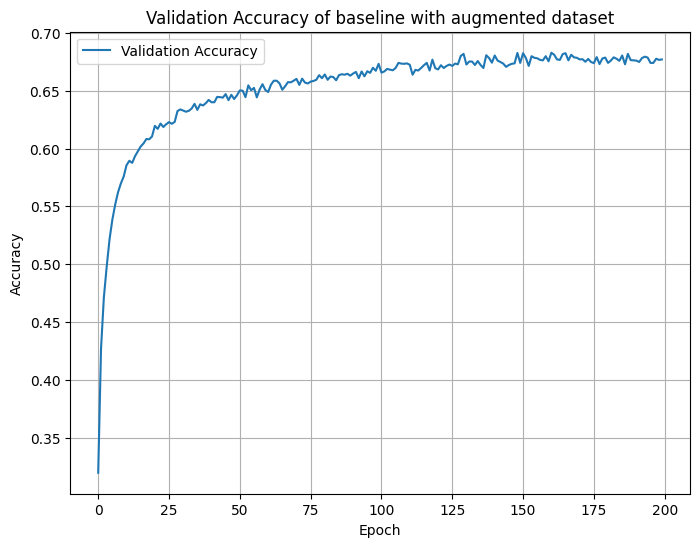

In [38]:
plt.figure(figsize=(8, 6))
plt.plot(history_model_p3_baseline_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy of baseline with augmented dataset')
plt.legend()
plt.grid()
plt.show()

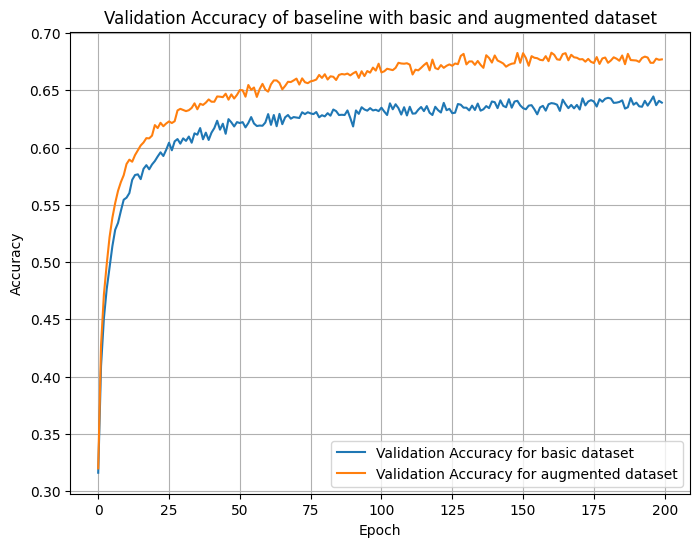

In [39]:
plt.figure(figsize=(8, 6))
plt.plot(history_model_p3_baseline.history['val_accuracy'], label='Validation Accuracy for basic dataset')
plt.plot(history_model_p3_baseline_2.history['val_accuracy'], label='Validation Accuracy for augmented dataset')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy of baseline with basic and augmented dataset')
plt.legend()
plt.grid()
plt.show()

In [40]:
# The validation accuracy results demonstrate that augmenting the data with various transformations produces superior performance compared to using the unmodified data. This finding highlights the benefits of expanding the dataset through techniques like data augmentation, as having more examples, even if slightly altered, can improve model generalization.

The validation accuracy results demonstrate that augmenting the data with various transformations produces superior performance compared to using the unmodified data. This finding highlights the benefits of expanding the dataset through techniques like data augmentation, as having more examples, even if slightly altered, can improve model generalization.

# PART 4 Self-Supervised Learning via Pretext Tasks

In [41]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 8.1 MB/s eta 0:00:00


In [95]:
# importing basic packages
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
# getting the data set ref :https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data
(x_train , y_train) , (x_test , y_test) = tf.keras.datasets.cifar10.load_data()

In [97]:
x_train.shape,x_test.shape


((50000, 32, 32, 3), (10000, 32, 32, 3))

In [98]:
# ref :https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
# normalizing the train and test data

In [99]:
# rescale the pixels to [-1, 1]
# after normalization the data was in the range of 0-1 then if we multiply it by 2 it is in the range of 0-2 then subtracting 1 its in the range of -1 to 1
x_train = 2*x_train - 1
x_test = 2*x_test - 1

In [100]:
x_train.shape

(50000, 32, 32, 3)

In [101]:
# taking 500 samples from the dataset that too even the last ones
x_train_500 = x_train[49500:]
y_train_500 = y_train[49500:]

In [102]:
x_train_500.shape,y_train_500.shape

((500, 32, 32, 3), (500, 1))

In [103]:
x_train_class0 = x_train[0:49500]
x_train_class0.shape

(49500, 32, 32, 3)

In [104]:
y_train_class0 = np.zeros(49500)
y_train_class0.shape,y_train_class0[645]

((49500,), 0.0)

In [105]:
# ref : https://www.tensorflow.org/api_docs/python/tf/image/flip_up_down
x_train_class1 = tf.image.flip_up_down(x_train[0:49500])
x_train_class1.shape

TensorShape([49500, 32, 32, 3])

In [106]:
y_train_class1 = np.ones(49500)
y_train_class1.shape,y_train_class1[645]

((49500,), 1.0)

In [107]:
x_train_class2 = tf.image.rot90(x_train[0:49500])
x_train_class2.shape,

(TensorShape([49500, 32, 32, 3]),)

In [108]:
y_train_class2 = (np.ones(49500))*2
y_train_class2.shape,y_train_class2[645]

((49500,), 2.0)

In [ ]:
# ref : for merging dataset https://stackoverflow.com/questions/65308080/how-to-merge-two-numpy-datasets-based-of-index

In [109]:
X_train_final_augmented_dataset = np.concatenate((x_train_class0, x_train_class1, x_train_class2))

In [110]:
Y_train_final_augmented_dataset = np.concatenate((y_train_class0, y_train_class1, y_train_class2))

In [111]:
X_train_final_augmented_dataset.shape,Y_train_final_augmented_dataset.shape

((148500, 32, 32, 3), (148500,))

In [112]:
input_shape_image = X_train_final_augmented_dataset.shape[1:]
input_shape_image

(32, 32, 3)

In [113]:
# creating base line model with the given architecture
def custom_initializer(shape, dtype=None):
  initial_weights = tf.keras.initializers.HeNormal()(shape, dtype=dtype)
  return initial_weights
model_p4_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=(5, 5), input_shape=input_shape_image, strides=1,activation = 'relu', kernel_initializer=custom_initializer),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=10, kernel_size=(5, 5), strides=1, activation = 'relu', kernel_initializer=custom_initializer),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(20,activation = 'relu', kernel_initializer=custom_initializer),
    tf.keras.layers.Dense(3, activation = 'softmax', kernel_initializer=custom_initializer),
])
model_p4_1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 10)        760       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 14, 14, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 10)        2510      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 5, 5, 10)          0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 250)               0         
                                                                 
 dense_11 (Dense)            (None, 20)               

In [114]:
loss_fn =tf.keras.metrics.sparse_categorical_crossentropy
optimizer_fn = tf.keras.optimizers.Adam(learning_rate=0.001)

In [115]:
# Compile the model (add optimizer and loss function)
model_p4_1.compile(optimizer=optimizer_fn, loss=loss_fn,metrics=['accuracy'])

In [116]:
Y_train_final_augmented_dataset.shape

(148500,)

In [117]:
history_model_p4_1 = model_p4_1.fit(X_train_final_augmented_dataset,Y_train_final_augmented_dataset,epochs=100,batch_size=2048)

Epoch 1/100
73/73 [==============================] - 3s 22ms/step - loss: 1.0124 - accuracy: 0.4797
Epoch 2/100
73/73 [==============================] - 2s 21ms/step - loss: 0.8669 - accuracy: 0.5928
Epoch 3/100
73/73 [==============================] - 2s 21ms/step - loss: 0.8241 - accuracy: 0.6221
Epoch 4/100
73/73 [==============================] - 2s 21ms/step - loss: 0.7962 - accuracy: 0.6388
Epoch 5/100
73/73 [==============================] - 2s 21ms/step - loss: 0.7761 - accuracy: 0.6512
Epoch 6/100
73/73 [==============================] - 2s 21ms/step - loss: 0.7591 - accuracy: 0.6607
Epoch 7/100
73/73 [==============================] - 2s 21ms/step - loss: 0.7466 - accuracy: 0.6675
Epoch 8/100
73/73 [==============================] - 2s 21ms/step - loss: 0.7354 - accuracy: 0.6744
Epoch 9/100
73/73 [==============================] - 2s 21ms/step - loss: 0.7269 - accuracy: 0.6787
Epoch 10/100
73/73 [==============================] - 2s 21ms/step - loss: 0.7189 - accuracy: 0.6839

In [118]:
# creating base line model with the given architecture
def custom_initializer(shape, dtype=None):
  initial_weights = tf.keras.initializers.HeNormal()(shape, dtype=dtype)
  return initial_weights
model_p4_baseline = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=(5, 5), input_shape=input_shape_image, strides=1,activation = 'relu', kernel_initializer=custom_initializer),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=10, kernel_size=(5, 5), strides=1, activation = 'relu', kernel_initializer=custom_initializer),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(20,activation = 'relu', kernel_initializer=custom_initializer),
    tf.keras.layers.Dense(10, activation = 'softmax', kernel_initializer=custom_initializer),])
model_p4_baseline.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 10)        760       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 10, 10, 10)        2510      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 5, 5, 10)          0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 250)               0         
                                                                 
 dense_13 (Dense)            (None, 20)               

In [119]:
loss_fn =tf.keras.metrics.sparse_categorical_crossentropy
optimizer_fn = tf.keras.optimizers.Adam(learning_rate=0.001)

In [120]:
# Compile the model (add optimizer and loss function)
model_p4_baseline.compile(optimizer=optimizer_fn, loss=loss_fn,metrics=['accuracy'])

In [121]:
model_p4_baseline

In [122]:
history_model_p4_baseline = model_p4_baseline.fit(x_train_500,y_train_500,epochs=10000,batch_size=2048,validation_data=(x_test,y_test))

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 117ms/step - loss: 1.6315e-06 - accuracy: 1.0000 - val_loss: 14.2124 - val_accuracy: 0.2953
Epoch 7502/10000
1/1 [==============================] - 0s 111ms/step - loss: 1.6303e-06 - accuracy: 1.0000 - val_loss: 14.2129 - val_accuracy: 0.2953
Epoch 7503/10000
1/1 [==============================] - 0s 112ms/step - loss: 1.6296e-06 - accuracy: 1.0000 - val_loss: 14.2135 - val_accuracy: 0.2953
Epoch 7504/10000
1/1 [==============================] - 0s 111ms/step - loss: 1.6284e-06 - accuracy: 1.0000 - val_loss: 14.2140 - val_accuracy: 0.2953
Epoch 7505/10000
1/1 [==============================] - 0s 114ms/step - loss: 1.6272e-06 - accuracy: 1.0000 - val_loss: 14.2145 - val_accuracy: 0.2953
Epoch 7506/10000
1/1 [==============================] - 0s 112ms/step - loss: 1.6265e-06 - accuracy: 1.0000 - val_loss: 14.2150 - val_accuracy: 0.2953
Epoch 7507/10000
1/1 [==============================] - 0s 1

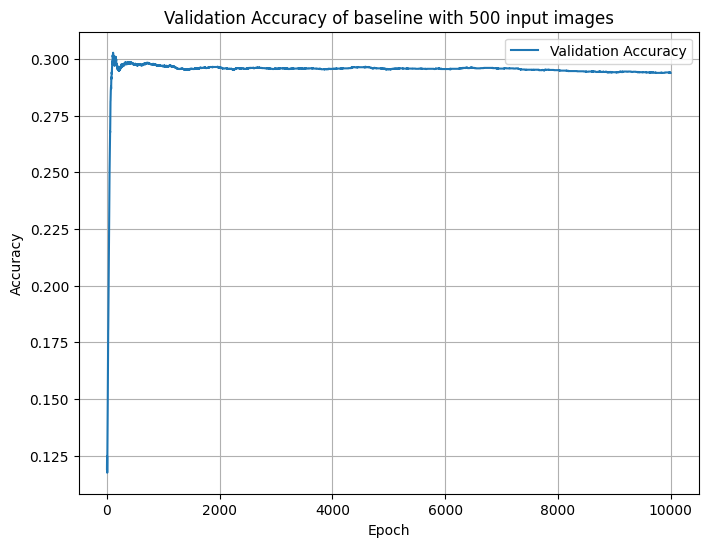

In [123]:
plt.figure(figsize=(8, 6))
plt.plot(history_model_p4_baseline.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy of baseline with 500 input images')
plt.legend()
plt.grid()
plt.show()

In [124]:
#ref : https://github.com/tensorflow/tensorflow/issues/22479
model_p4_transfer_learning = tf.keras.Sequential(model_p4_1.layers[:-1])

In [125]:
model_p4_transfer_learning.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 10)        760       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 14, 14, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 10)        2510      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 5, 5, 10)          0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 250)               0         
                                                                 
 dense_11 (Dense)            (None, 20)               

In [126]:
model_p4_transfer_learning.add(tf.keras.layers.Dense(10,activation='softmax',kernel_initializer=custom_initializer))

In [127]:
# ref :https://www.tensorflow.org/addons/api_docs/python/tfa/optimizers/MultiOptimizer
optimizers = [tf.keras.optimizers.Adam(learning_rate=1e-5),tf.keras.optimizers.Adam(learning_rate=1e-2)]
optimizers_and_layers = [(optimizers[0], model_p4_transfer_learning.layers[:-1]), (optimizers[1], model_p4_transfer_learning.layers[-1])]
#ref : https://stackoverflow.com/questions/61380552/unable-to-import-tensorflow-addons
from tensorflow_addons.optimizers import MultiOptimizer
optimizer = MultiOptimizer(optimizers_and_layers)
model_p4_transfer_learning.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [128]:
model_p4_transfer_learning.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 10)        760       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 14, 14, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 10)        2510      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 5, 5, 10)          0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 250)               0         
                                                                 
 dense_11 (Dense)            (None, 20)               

In [129]:
x_train_500.shape,y_train_500.shape,x_test.shape,y_test.shape

((500, 32, 32, 3), (500, 1), (10000, 32, 32, 3), (10000, 1))

In [130]:
#ref : https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical
y_train_500 = tf.keras.utils.to_categorical(y_train_500,num_classes = 10)
y_test = tf.keras.utils.to_categorical(y_test,num_classes = 10)

In [131]:
y_train_500

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [132]:
x_train_500.shape,y_train_500.shape,x_test.shape,y_test.shape

((500, 32, 32, 3), (500, 10), (10000, 32, 32, 3), (10000, 10))

In [133]:
model_p4_transfer_learning

In [134]:
history_model_p4_transfer_learning = model_p4_transfer_learning.fit(x_train_500,y_train_500,epochs=10000,batch_size=256,validation_data=(x_test,y_test),verbose=True)

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 163ms/step - loss: 8.3587e-05 - accuracy: 1.0000 - val_loss: 16.5959 - val_accuracy: 0.3289
Epoch 7502/10000
2/2 [==============================] - 0s 165ms/step - loss: 8.3469e-05 - accuracy: 1.0000 - val_loss: 16.5970 - val_accuracy: 0.3289
Epoch 7503/10000
2/2 [==============================] - 0s 165ms/step - loss: 8.3369e-05 - accuracy: 1.0000 - val_loss: 16.5982 - val_accuracy: 0.3288
Epoch 7504/10000
2/2 [==============================] - 0s 163ms/step - loss: 8.3282e-05 - accuracy: 1.0000 - val_loss: 16.5991 - val_accuracy: 0.3289
Epoch 7505/10000
2/2 [==============================] - 0s 160ms/step - loss: 8.3190e-05 - accuracy: 1.0000 - val_loss: 16.6005 - val_accuracy: 0.3289
Epoch 7506/10000
2/2 [==============================] - 0s 166ms/step - loss: 8.3084e-05 - accuracy: 1.0000 - val_loss: 16.6020 - val_accuracy: 0.3288
Epoch 7507/10000
2/2 [==============================] - 0s 1

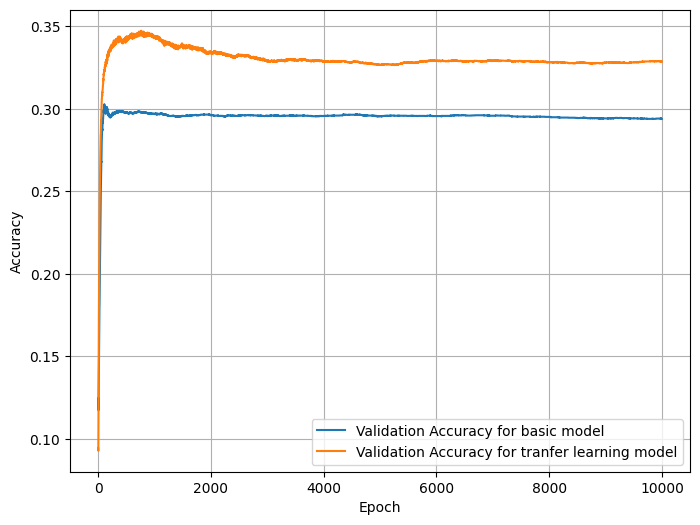

In [135]:
plt.figure(figsize=(8, 6))
plt.plot(history_model_p4_baseline.history['val_accuracy'], label='Validation Accuracy for basic model')
plt.plot(history_model_p4_transfer_learning.history['val_accuracy'], label='Validation Accuracy for tranfer learning model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

The two graphs indicate that transfer learning significantly outperforms the baseline model, highlighting its superiority in capturing intricate patterns and knowledge from a pre-trained model. Its potential impact on real-world applications and cost-effectiveness makes it a preferred approach for various deep learning tasks.

In [126]:
%%shell
jupyter nbconvert --to html /content/vvsharma_dls_a2.ipynb


[NbConvertApp] Converting notebook /content/vvsharma_dls_a2.ipynb to html
[NbConvertApp] Writing 3483248 bytes to /content/vvsharma_dls_a2.html
